In [11]:
# Cell to hide - just an option and import other functions

import pandas as pd
pd.set_option('display.max_columns', 27)

%run 1-functions.ipynb

## Predict the width of a ship <a class="anchor" id="width"></a>

### Make the prediction

You customer would like a model that is able to predict the width of a ship, knowing its length. For this first task, the model will take only the length attribute as an input, and predict the width. You can use the static dataset.

In [12]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

We can put both attribute names in two variables: ``x`` (containing a list of the predictive variables, here only length) and ``y`` (containing a list of the predicted variable). In general, the list ``y`` will always contain only one variable, as we only want to predict one attribute at a time.

In [13]:
# Prediction of Width from Length

x = ['Length']
y = ['Width']

As the prediction of the width of a ship is a regression problem, we use the function ``knn_regression()`` __TODO: add link to functions page when it is made__ to make the prediction. Then we can calculate the MAE __TODO: add link to supervised learning page__ with the method [mean_absolute_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) from the ``sklearn`` library.

In [14]:
from sklearn.metrics import mean_absolute_error

pred1, ytest1 = knn_regression(static_data, x, y)
print('MAE with all data: ' + str(mean_absolute_error(pred1, ytest1)))

MAE with all data: 2.73451052631579


In the previous part, we already identified that the length and width attributes contain some missing values. We can try to make a prediction on a selected part of the dataset, that doesn't contain missing values. For that, we use the method [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) on the dataframe. Then, we make a new prediction on the selected dataset and print the MAE.

In [15]:
static_selected = static_data.dropna()

pred2, ytest2 = knn_regression(static_selected, x, y)
print('MAE without NaN: ' + str(mean_absolute_error(pred2, ytest2)))

MAE without NaN: 2.0717238095238097


The error dropped (this means that the performance of the model increased when we removed the missing data). Before coming to any conclusion, we need to analyze in details the reason of this increase of performance, and think if it is really what we want.

### Analyze the results

Originally, the KNN algorithm cannot handle missing values. This means that, in the function ``knn_regression()``, an additional step has been taken to ensure that the prediction was not made on a dataset containing missing values. The basic action that we chose here is to replace every missing value with ``0``.

Let's have a look at the number of missing values for each attribute, to get an idea on how much of the dataset was replaced by ``0`` value:

In [31]:
print('Number of instances in the dataset: ' + str(len(static_data)))
print('Number of missing values for Length: ' + str(static_data['Length'].isnull().sum()))
print('Number of missing values for Width: ' + str(static_data['Width'].isnull().sum()))

Number of instances in the dataset: 1520
Number of missing values for Length: 300
Number of missing values for Width: 609


As we can see, for the predicted attribute ``Width``, more than a third of the dataset was containing missing values, that were replaced by zero value.

To go further, we can compare the distribution of the dataset with missing values, and the one with replaced 0 values. To replace all missing values in the dataset, we use the function [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html), with the parameter ``value = 0``.

We plot the two considered attributes together. This allows us to understand how the KNN algorithm makes predictions according to the value of the Length attribute.

Text(0.5, 1.0, 'Width vs. Length with NaN filled with zero values')

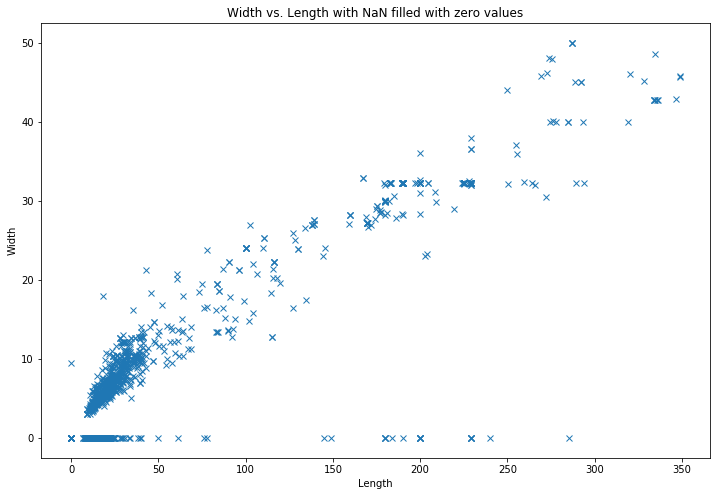

In [69]:
# Missing values filled with zeros

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(static_data.fillna(value = 0)['Length'], static_data.fillna(value = 0)['Width'], 'x')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Width vs. Length with NaN filled with zero values')

Text(0.5, 1.0, 'Width vs. Length with NaN dropped')

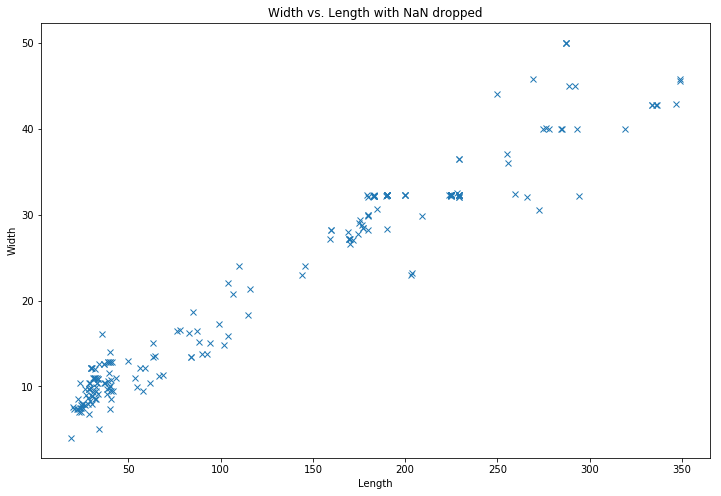

In [68]:
# Missing values dropped

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(static_data.dropna()['Length'], static_data.dropna()['Width'], 'x')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Width vs. Length with NaN dropped')

In [67]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']

def plot_2att(mode):
    if mode == 'filled_zeros':
        df = static_data.fillna(value = 0)
        title = 'Width vs. Length with NaN filled with zero values'
    elif mode == 'drop_na':
        df = static_data.dropna()
        title = 'Width vs. Length with NaN dropped'
    
    plt.figure(figsize = (12, 8))
    plt.plot(df['Length'], df['Width'], 'x')
    plt.xlabel('Length')
    plt.ylabel('Width')
    plt.title(title)

interact(plot_2att,
         mode = widgets.Dropdown(options = modes,
                                 value = modes[0],
                                 description = 'Mode:',
                                 disabled = False,))

interactive(children=(Dropdown(description='Mode:', options=('filled_zeros', 'drop_na'), value='filled_zeros')…

<function __main__.plot_2att(mode)>

We can see that the attribute ``Width`` contains more zero values than the attribute ``Length``: for the prediction, as the KNN algorithm bases its results on the value of the attribute ``Length``, the predictions will stay on the diagonal more than predict 0 values. This will lead to a greater error, as we will see now.

Now we can have a look at the predictions made by the KNN algorithms, for both cases: we plot the predictions versus the true values (we got these lists when we used the function ``knn_regression()``): the more the plot shows a diagonal, the better the prediction was.

Text(0.5, 1.0, 'Prediction vs. true label with NaN filled with zero values')

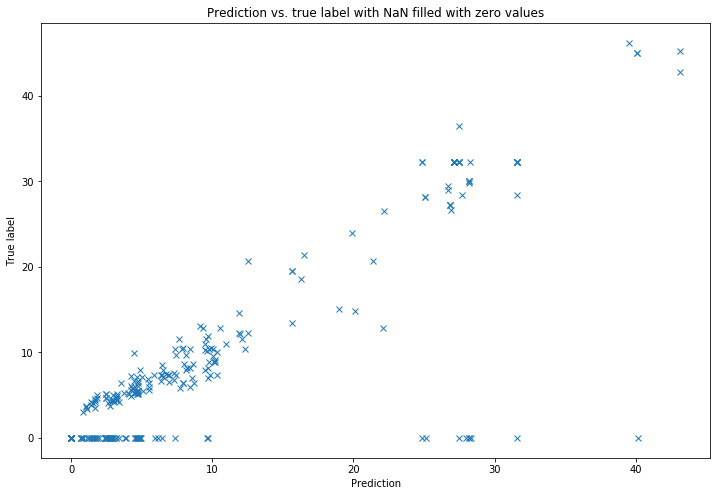

In [70]:
# Missing values filled with zeros
pred = []
for element in pred1:
    pred.append(element[0])

plt.figure(figsize = (12, 8))
plt.plot(pred, ytest1, 'x')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label with NaN filled with zero values')

Text(0.5, 1.0, 'Prediction vs. true label with NaN dropped')

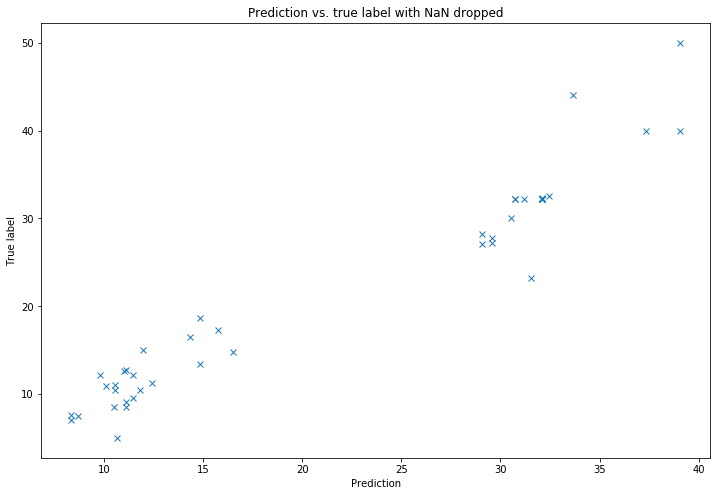

In [72]:
# Missing values filled with zeros
pred = []
for element in pred2:
    pred.append(element[0])

plt.figure(figsize = (12, 8))
plt.plot(pred, ytest2, 'x')
plt.xlabel('Prediction')
plt.ylabel('True label')
plt.title('Prediction vs. true label with NaN dropped')

In [75]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

modes = ['filled_zeros', 'drop_na']

def plot_2att(mode):
    
    plt.figure(figsize = (12, 8))
    
    if mode == 'filled_zeros':
        pred = []
        for element in pred1:
            pred.append(element[0])
        plt.plot(pred, ytest1, 'x')
        title = 'Prediction vs. true label with NaN filled with zero values'
    elif mode == 'drop_na':
        pred = []
        for element in pred2:
            pred.append(element[0])
        plt.plot(pred, ytest2, 'x')
        title = 'Prediction vs. true label with NaN dropped'

    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(title)

interact(plot_2att,
         mode = widgets.Dropdown(options = modes,
                                 value = modes[0],
                                 description = 'Mode:',
                                 disabled = False,))

interactive(children=(Dropdown(description='Mode:', options=('filled_zeros', 'drop_na'), value='filled_zeros')…

<function __main__.plot_2att(mode)>

From these visualizations, it is clear that in the case where the missing values were filled with zeros, the model didn't give much zero predictions. It is then understandable that the error was greater in the case were the missing values were replaced with zeros: the prediction gave "normal" values, following the diagonal of the distribution of the attributes length vs. width, instead of giving zero values.

As a reminder, the mean absolute error is the average of the difference between the prediction and the actual value. If the actual value is 0, the error is the value of the prediction, which tends to increase the error easily.

### What is the best scenario?

To make a choice on how to deal with missing values in that case, we have to connect our analysis to the meaning of the problem: if we choose to replace the missing values with zero values, this implies that we have zero values in our test set. The test set is the dataset that is compared with the data we would have in the real world, and we would make predictions on.

A zero value for the length or width of a ship is not a natural value: you will never find a ship with a length of 0 meters. So in that case, replacing missing values with zero does not make much sense and we can think that dropping the missing values is the best solution for creating a model that comes closest to a real-world situation.

### Quiz

<iframe src="https://h5p.org/h5p/embed/755089" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>

## Predict the mean speed from the type of vessel <a class="anchor" id="meansog"></a>

Your customer now would like to be able to predict the mean SOG of a ship, knowing the type of ship. This can be useful to predict when a particular ship would arrive at a lock, for example. The static dataset is again used in this case.

Solve these two widgets to determine the values of the ``x`` and ``y`` variables and the appropriate function to use (if the problem is regression or classification).

<iframe src="https://h5p.org/h5p/embed/753577" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>

<iframe src="https://h5p.org/h5p/embed/753637" width="694" height="300" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>

Start with filling the ``x`` and ``y`` variables with the appropriate attributes.

In [ ]:
# Prediction of MeanSOG from VesselType
x = []
y = []

Make the predictions with the right prediction function (replace the ``xxx`` with the appropriate name: ``classification`` or ``regression``).

In [ ]:
static_selected = static_data.dropna()

pred1, ytest1 = knn_xxx(static_data, x, y)
pred2, ytest2 = knn_xxx(static_selected, x, y)

print('MAE with all data: ' + str(mean_absolute_error(pred1, ytest1)))
print('MAE without NaN: ' + str(mean_absolute_error(pred2, ytest2)))

In [10]:
# For beginner version: hide cell

import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

functions = ['not chosen', 'classification', 'regression']
attributes = static_data.columns

def make_prediction(x, y, function):
    static_selected = static_data.dropna()
    
    if function == 'regression' and static_data[y].dtype.name in ['object', 'int64', 'float64']:
        pred1, ytest1 = knn_regression(static_data, [x], [y])
        pred2, ytest2 = knn_regression(static_selected, [x], [y])
        
        print('MAE with all data: ' + str(mean_absolute_error(pred1, ytest1)))
        print('MAE without NaN: ' + str(mean_absolute_error(pred2, ytest2)))
    
    elif function == 'classification' and static_data[y].dtype.name == ['category']:
        pred1, ytest1 = knn_classification(static_data, [x], [y])
        pred2, ytest2 = knn_classification(static_selected, [x], [y])
        
        print('Accuracy with all data: ' + str(accuracy_score(pred1, ytest1)))
        print('Accuracy without NaN: ' + str(accuracy_score(pred2, ytest2)))

interact(make_prediction,
         x = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'x = ',
            disabled = False,),
         y = widgets.Dropdown(
            options = attributes,
            value = attributes[0],
            description = 'y = ',
            disabled = False,),
         function = widgets.Dropdown(
            options = functions,
            value = functions[0],
            description = 'Type: ',
            disabled = False,))

interactive(children=(Dropdown(description='x = ', options=('TripID', 'MMSI', 'MeanSOG', 'VesselName', 'IMO', …

<function __main__.make_prediction(x, y, function)>

This time, we see that the performance decreased without the missing data.

__TODO: explanation: MeanSOG has a lot of missing values that are replaced with 0. Check the missing values of VesselType.__

## How to deal with missing values

__TODO__
+ recover by guessing or predicting
+ set up a neutral / constant value
+ drop the columns or rows with missing values